Import CSV

In [19]:
import pandas as pd
import numpy

df = pd.read_csv("QVoting with Polling PRR-and-PSV-table.csv")

# Parse vectors

parse_vectors = lambda f: f.apply(lambda array: numpy.fromstring(array[1:-1], sep = ' ', dtype = float))  
df["Utility"] = parse_vectors(df["Utility"])
df["Votes"] = parse_vectors(df["Votes"])
df["Poll"] = parse_vectors(df["Poll"])

Questions to Answer
====================
Can we scatter plot polling vector vs. voting vector and try to draw a correlation?

Does the difference between x and y vector during polling have any effect on the outcome?

Is there a correlation of proportion of voters polled and strategic voters vs. efficient outcomes?


Below is the analysis for Poll vector vs. Votes Cast

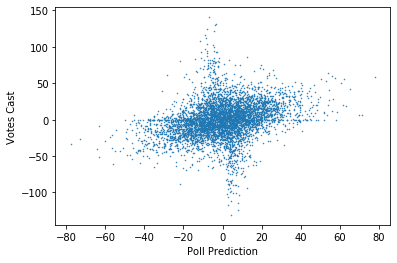

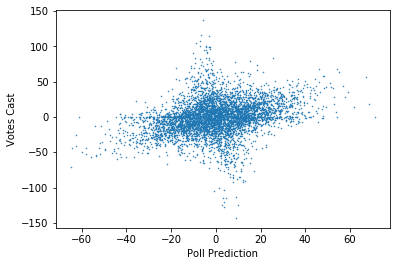

In [20]:
import matplotlib

# We are going to compare polling prediction vs Votes Cast
xdf = pd.DataFrame(columns=["Poll Prediction", "Votes Cast"])
ydf = pd.DataFrame(columns=["Poll Prediction", "Votes Cast"])

first_item = lambda d : d.apply(lambda x: float(x[0]))
second_item = lambda d : d.apply(lambda x: float(x[1]))

xdf["Poll Prediction"] = first_item(df["Poll"])
ydf["Poll Prediction"] = second_item(df["Poll"])

xdf["Votes Cast"] = first_item(df["Votes"])
ydf["Votes Cast"] = second_item(df["Votes"])

# Not all data points are taken, so the graph is not that cluttered, and t
xdf.sample(n = 5000).plot.scatter("Poll Prediction", "Votes Cast", s = .25)
ydf.sample(n = 5000).plot.scatter("Poll Prediction", "Votes Cast", s = .25)


Let's filter the populations with the maximum PSV, PSV = 1, and analyze Poll vector vs. Votes Cast

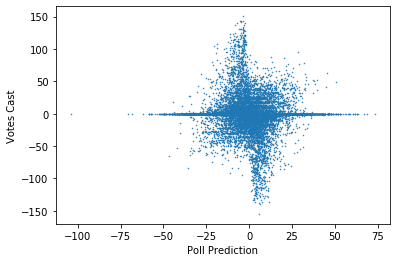

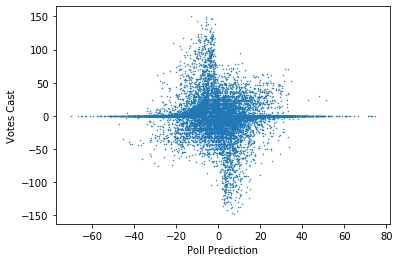

In [14]:
high_psv_df = df[df["PSV"] == 1]

xdf["Poll Prediction"] = first_item(high_psv_df["Poll"])
ydf["Poll Prediction"] = second_item(high_psv_df["Poll"])

xdf["Votes Cast"] = first_item(high_psv_df["Votes"])
ydf["Votes Cast"] = second_item(high_psv_df["Votes"])

xdf.plot.scatter("Poll Prediction", "Votes Cast", s = .25)
ydf.plot.scatter("Poll Prediction", "Votes Cast", s = .25)

Let's filter the populations with the minimum PSV, PSV = 0, for control, and analyze Poll vector vs. Votes Cast

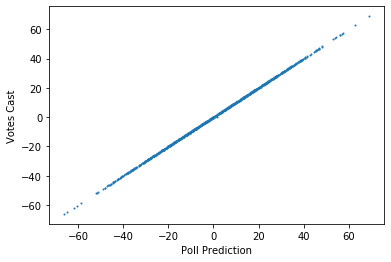

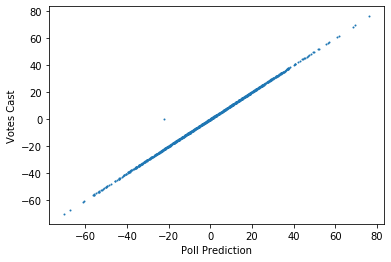

In [15]:
zero_psv_df = df[df["PSV"] == 0]

xdf["Poll Prediction"] = first_item(zero_psv_df["Poll"])
ydf["Poll Prediction"] = second_item(zero_psv_df["Poll"])

xdf["Votes Cast"] = first_item(zero_psv_df["Votes"])
ydf["Votes Cast"] = second_item(zero_psv_df["Votes"])

xdf.plot.scatter("Poll Prediction", "Votes Cast", s = 1)
ydf.plot.scatter("Poll Prediction", "Votes Cast", s = 1)

For the most extreme case, let's filter the populations with the maximum PSV and maximum RR, PSV, RR = 1, for control, and analyze Poll vector vs. Votes Cast

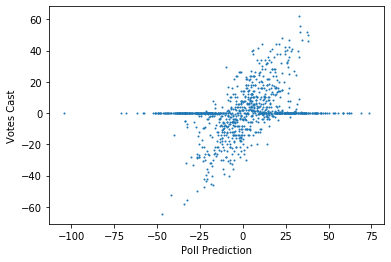

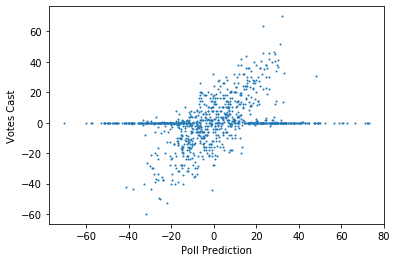

In [16]:
max_psv_df = df[(df["PSV"] == 1) & (df["RR"] == 1)]

xdf["Poll Prediction"] = first_item(max_psv_df["Poll"])
ydf["Poll Prediction"] = second_item(max_psv_df["Poll"])

xdf["Votes Cast"] = first_item(max_psv_df["Votes"])
ydf["Votes Cast"] = second_item(max_psv_df["Votes"])

xdf.plot.scatter("Poll Prediction", "Votes Cast", s = 1)
ydf.plot.scatter("Poll Prediction", "Votes Cast", s = 1)

The most accurate case is most likely .25 < PSV < .75 

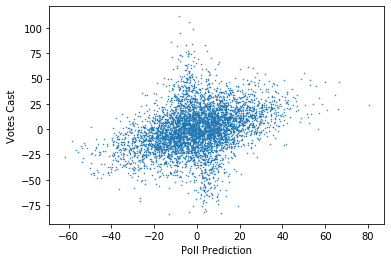

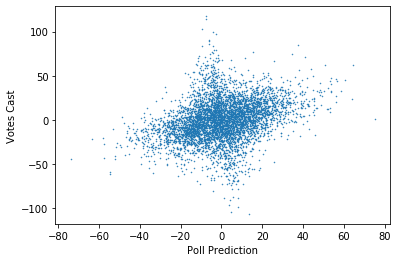

In [17]:
acc_psv_df = df[(df["PSV"] > .25) & (df["PSV"] < .75)]

xdf["Poll Prediction"] = first_item(acc_psv_df["Poll"])
ydf["Poll Prediction"] = second_item(acc_psv_df["Poll"])

xdf["Votes Cast"] = first_item(acc_psv_df["Votes"])
ydf["Votes Cast"] = second_item(acc_psv_df["Votes"])

xdf.sample(n=10000).plot.scatter("Poll Prediction", "Votes Cast", s = .25)
ydf.sample(n=10000).plot.scatter("Poll Prediction", "Votes Cast", s = .25)

Comparing Difference of polling between issues
==============

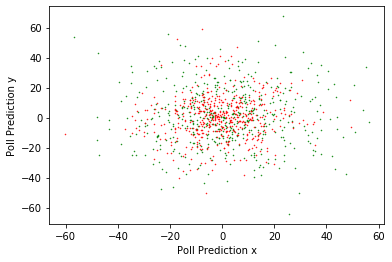

In [21]:
diff_df = pd.DataFrame(columns=["Poll Prediction x", "Poll Prediction y", "Efficient"])
data_sample = df.sample(n=1000)
diff_df["Poll Prediction x"] = first_item(data_sample["Poll"])
diff_df["Poll Prediction y"] = second_item(data_sample["Poll"])
diff_df["Efficient"] = df["Utility"].apply(lambda x: False not in (x > 0))

ax = diff_df[diff_df["Efficient"]].plot.scatter("Poll Prediction x", "Poll Prediction y", s = .25, c = "g")
diff_df[~diff_df["Efficient"]].plot.scatter("Poll Prediction x", "Poll Prediction y", s = .25, c = "r", ax = ax)